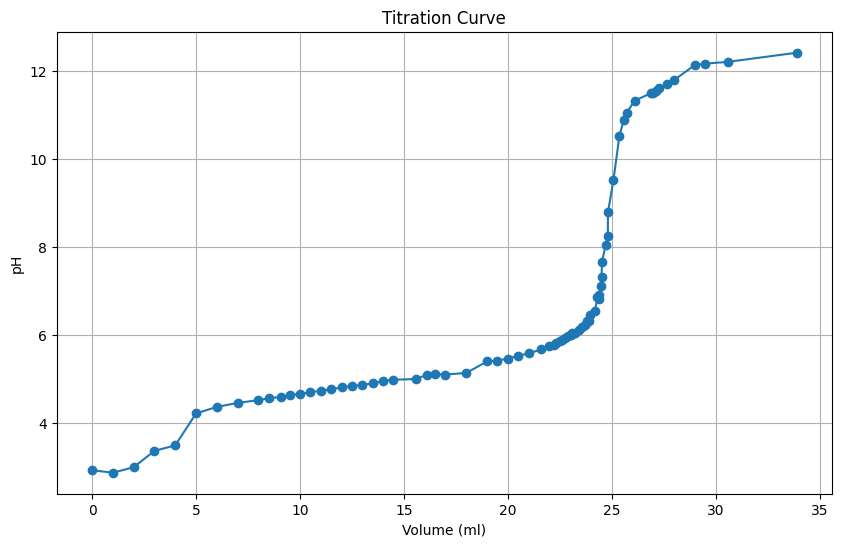

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('edited.csv')

# Sort the dataframe by 'Data Set 1:volume(ml)'
df_sorted = df.sort_values(by='Data Set 1:volume(ml)')

# Plot pH vs. volume
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Data Set 1:volume(ml)'], df_sorted['Data Set 1:pH'], marker='o', linestyle='-')
plt.title('Titration Curve')
plt.xlabel('Volume (ml)')
plt.ylabel('pH')
plt.grid(True)
plt.show()


In [12]:
df_sorted

,Unnamed: 0,Data Set 1:pH,Data Set 1:volume(ml),dpH/dV,pH_normalized,dpH/dV_normalized
0,0,2.918668,0.000000,-0.009495,0.005958,0.000000
1,1,2.861700,1.000000,0.005737,0.000000,0.001558
2,2,2.987518,2.000000,0.041475,0.013159,0.005214
3,3,3.359398,3.000000,0.041379,0.052054,0.005204
4,4,3.484064,4.000000,0.070986,0.065093,0.008233
...,...,...,...,...,...,...
69,69,11.797036,27.987654,0.046975,0.934543,0.005777
70,70,12.137766,28.987654,0.027016,0.970179,0.003735
71,71,12.174158,29.487510,0.010263,0.973986,0.002021
72,72,12.214753,30.590000,0.007222,0.978231,0.001710


In [13]:
df_save = pd.DataFrame()
df_save['Data Set 1:pH'] = df_sorted['Data Set 1:pH']
df_save['Data Set 1:volume(ml)'] = df_sorted['Data Set 1:volume(ml)']

In [14]:
df_save.to_csv('edited.csv')

In [15]:
df2 = df_save
df2

,Data Set 1:pH,Data Set 1:volume(ml)
0,2.918668,0.000000
1,2.861700,1.000000
2,2.987518,2.000000
3,3.359398,3.000000
4,3.484064,4.000000
...,...,...
69,11.797036,27.987654
70,12.137766,28.987654
71,12.174158,29.487510
72,12.214753,30.590000


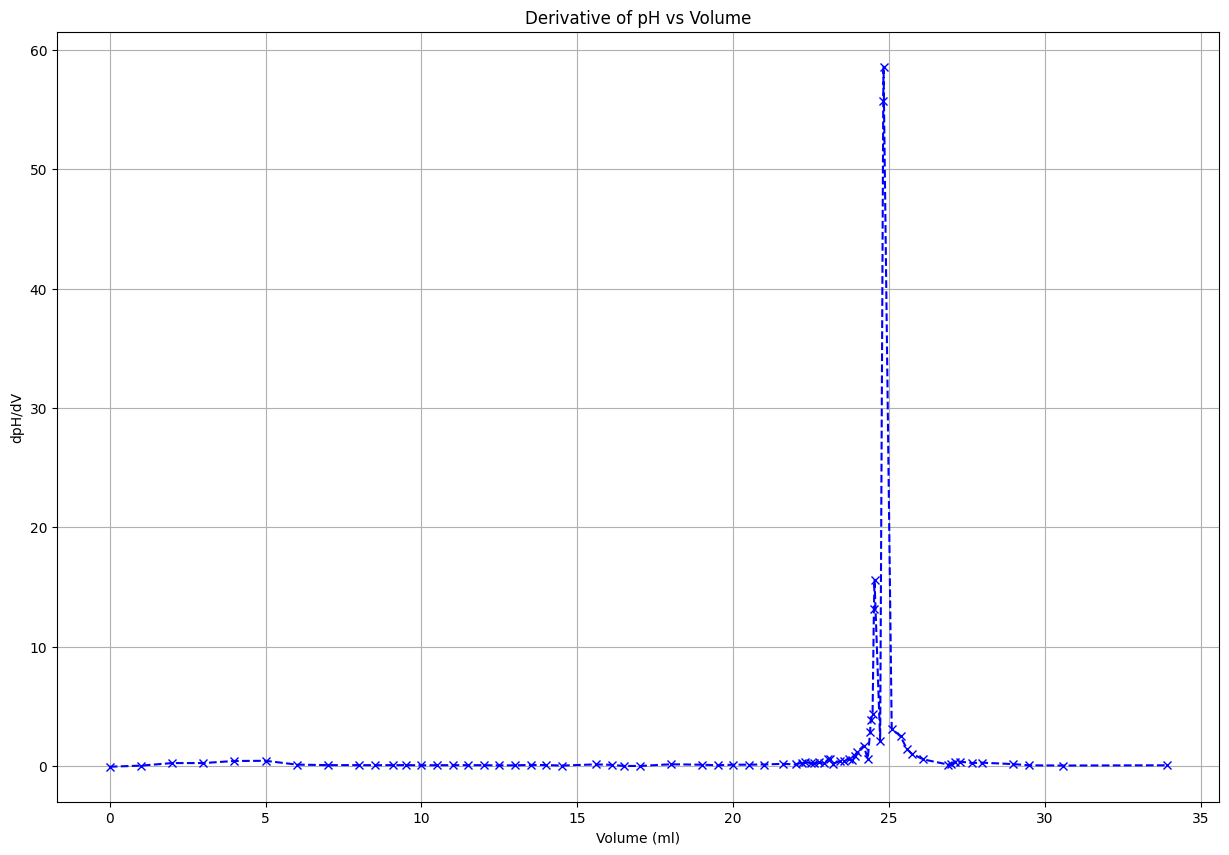

In [16]:
import numpy as np
# Calculating the derivative of pH with respect to volume (ΔpH/ΔV)
df2['dpH/dV'] = np.gradient(df2['Data Set 1:pH'], df2['Data Set 1:volume(ml)'])
df2['dpH/dV'] = df2['dpH/dV']/6
# Plotting the derivative vs volume
plt.figure(figsize=(15, 10))
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV'], marker='x', linestyle='--', color='b')
plt.title('Derivative of pH vs Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('dpH/dV')
plt.grid(True)
plt.show()

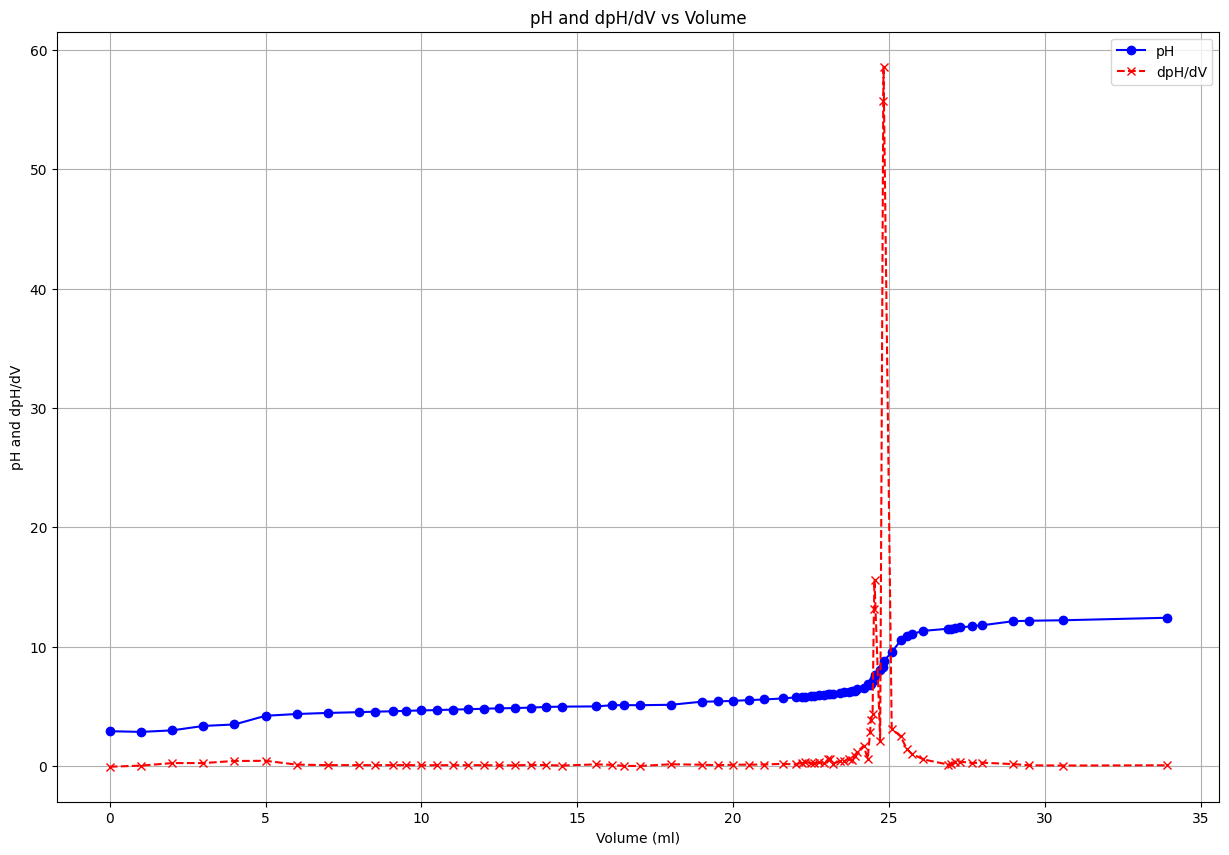

In [17]:
# Plotting both pH and derivative on the same graph
plt.figure(figsize=(15, 10))

# Plot pH
plt.plot(df2['Data Set 1:volume(ml)'], df2['Data Set 1:pH'], label='pH', marker='o', linestyle='-', color='b')

# Plot dpH/dV
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV'], label='dpH/dV', marker='x', linestyle='--', color='r')

# Adding labels and title
plt.title('pH and dpH/dV vs Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('pH and dpH/dV')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The pH value at the point where the derivative is maximized (Volume = 24.821234567891 ml) is 8.79.


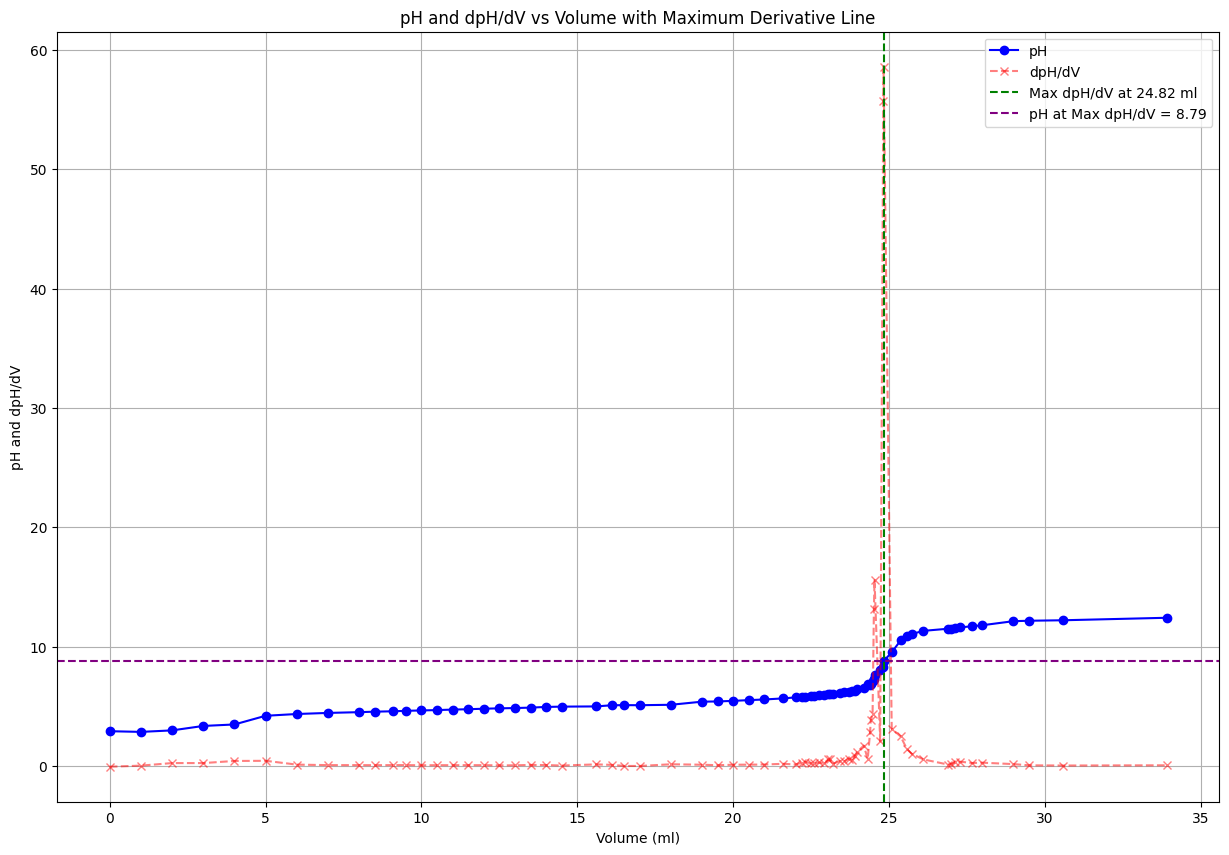

The pH value at the point where the derivative is maximized (Volume = 24.821234567891 ml) is 8.79.


In [18]:
# Find the index where dpH/dV is maximized
max_derivative_index = df2['dpH/dV'].idxmax()
max_volume = df2['Data Set 1:volume(ml)'].iloc[max_derivative_index]
max_pH = df2['Data Set 1:pH'].iloc[max_derivative_index]
max_dpH_dV = df2['dpH/dV'].iloc[max_derivative_index]

# Print the pH at the point of maximum derivative
print(f'The pH value at the point where the derivative is maximized (Volume = {max_volume} ml) is {max_pH:.2f}.')

# Plotting both pH and dpH/dV on the same graph
plt.figure(figsize=(15, 10))

# Plot pH
plt.plot(df2['Data Set 1:volume(ml)'], df2['Data Set 1:pH'], label='pH', marker='o', linestyle='-', color='b')

# Plot dpH/dV with reduced opacity
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV'], label='dpH/dV', marker='x', linestyle='--', color='r', alpha=0.5)

# Plot vertical line where derivative is maximized
plt.axvline(x=max_volume, color='g', linestyle='--', label=f'Max dpH/dV at {max_volume:.2f} ml')

# Plot horizontal line at the corresponding pH value for max dpH/dV
plt.axhline(y=max_pH, color='purple', linestyle='--', label=f'pH at Max dpH/dV = {max_pH:.2f}')

# Adding labels and title
plt.title('pH and dpH/dV vs Volume with Maximum Derivative Line')
plt.xlabel('Volume (ml)')
plt.ylabel('pH and dpH/dV')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the pH at the point of maximum derivative
print(f'The pH value at the point where the derivative is maximized (Volume = {max_volume} ml) is {max_pH:.2f}.')
